# Проект "Что-то про фильмы"
В ролях: Никонова Анна, Добрынина Анастасия

Режиссер-постановщик: Наша поехавшая кукуха


### Пролог. Начало

> Изначальный план был прост: использовать АРI Кинопоиска

>К сожалению, эти планы были не сбыточны по нескольким причинам:

>Первая из них - победить дракона, то есть: разобраться с документацией и сложностью структуры API, нам оказалась не по зубам.

Покажу вам наши последние наработки, когда мы уже почти достигли успеха:

In [8]:
import pandas as pd
import requests
import random

#сделайте вид, что тут нет токена, я дала эту ссылку только вам и приду за вами, если что!

headers = {"X-API-KEY": "KKATCJP-SWJMQS1-QT3FD0Y-45SWC8M"}

def get_random_movie(year_range):
    response = requests.get(
        'https://api.kinopoisk.dev/v1.4/movie',
        params={
            "limit": 10,
            "page": 1,
            "year": year_range
        },
        headers=headers
    )
    movies = response.json()
    return movies["docs"]

# year_range = "2023"
year_range = "1970-2023"

# genres = ["боевик", "драма"]
# или чтобы исключить жанр
# genres = ["!боевик"]
movie = get_random_movie(year_range)
df = pd.DataFrame(movie)
print(df)

        id                           name  \
0  5503579            BTOB. Будем вместе!   
1  5581330                 Привет, богиня   
2  5581357               Привет, продюсер   
3  5581091                           None   
4  5518183                      Море папы   
5  5512050                Бесконечный рай   
6  5518179                     Точка росы   
7  5518075    Двадцать лет со Смешариками   
8  5512033                  Жизнь в кадре   
9  5517132  Ник Кейв и The Birthday Party   

                        alternativeName  enName       type  typeNumber  year  \
0      BTOB TIME: Be Together the Movie     NaN      movie           1  2023   
1         Wo ke neng yu dao le jiu xing     NaN  tv-series           2  2022   
2                  Zheng hao yu jian ni     NaN  tv-series           2  2023   
3        Pretty Mouth and Green My Eyes     NaN      movie           1  2023   
4                                  None     NaN      movie           1  2023   
5                     Ka

>Вы скажете, да ладно! Все же работает! Но тут оказалось, что у дракона не одна голова, а три!!!

> И вторая: количество запросов в день ограничено))) Дада, к сожалению, лимит не позволяет скачать такое количество данных, чтобы мы отсеяли всю мишуру и получили около 1000 нормальных примеров.

>Тут мы решили рубить третью голову: Например, отсеять всю мишуру заранее и обращаться только за определенными фильмами. Это, как мы думали, можно сделать, если следовать их документации: https://api.kinopoisk.dev/documentation#/


>А вот тут нас в нокаут вынесла сложность их документация и фильтров. Мы не смогли с ними разобраться. Смогли воспользоваться только их фильтрами, получить вот такой url: https://api.kinopoisk.dev/v1.4/movie?page=1&limit=10&selectFields=id&selectFields=name&selectFields=type&selectFields=year&selectFields=rating&selectFields=budget&selectFields=audience&selectFields=movieLength&selectFields=genres&selectFields=countries&selectFields=persons&selectFields=fees&notNullFields=name&notNullFields=type&notNullFields=year&notNullFields=budget.value&notNullFields=budget.currency&notNullFields=audience.count&notNullFields=audience.country&notNullFields=movieLength&notNullFields=genres.name&notNullFields=countries.name&notNullFields=persons.id&notNullFields=persons.name&notNullFields=persons.profession&notNullFields=fees.world.value&type=movie&status=completed

>Дальше, к сожалению, ничего не сработало. Мы даже вступили в чатик девелоперов этого АПИ!!! И не смогли найти ответы на свои вопросы((

### Это было грустное вступление, чтобы вы поняли, что мы просто отчаялись, а не просто не захотели попробовать.

Теперь к основному повествованию:

Итак, отчаявшись в Кинопоиске, но не отчаявшись в своем проекте, мы решили не менять тему и нашли датасет на Kagle:

https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=credits.csv

Датасет нам понравился, мы в нем поковырялись и решили его использовать!

##### первым делом - берем нужные нам столбцы, формируем датасет и убираем лишнюю мишуру:

In [10]:
import pandas as pd
import json

import requests

#Почему гугл диск? Потому что файл слишком большой, гит не дает его загрузить(
url = 'https://drive.google.com/uc?export=download&id=1P0JCqEI8XHMhUavVWJ_uvIQDJ6OuBp1X'


response = requests.get(url)

with open('data.csv', 'wb') as file:
    file.write(response.content)

data1 = pd.read_csv('data.csv')

data1['genres'] = data1['genres'].apply(lambda x: ', '.join([genre['name'] for genre in eval(x)]))

df_1 = data1[['id','title', 'budget', 'revenue', 'release_date', 'genres', 'runtime','vote_average']]
#Тут мы убираем лишнее и смотрим, достаточно ли данных осталось:
df_1=df_1[df_1['vote_average']>0] 
filtered_df = df_1.loc[(df_1['budget'] != '0') & (df_1['revenue'] != 0)]
filtered_df['budget'] = filtered_df['budget'].astype(int)
filtered_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,title,budget,revenue,release_date,genres,runtime,vote_average
0,862,Toy Story,30000000,373554033.0,1995-10-30,"Animation, Comedy, Family",81.0,7.7
1,8844,Jumanji,65000000,262797249.0,1995-12-15,"Adventure, Fantasy, Family",104.0,6.9
3,31357,Waiting to Exhale,16000000,81452156.0,1995-12-22,"Comedy, Drama, Romance",127.0,6.1
5,949,Heat,60000000,187436818.0,1995-12-15,"Action, Crime, Drama, Thriller",170.0,7.7
8,9091,Sudden Death,35000000,64350171.0,1995-12-22,"Action, Adventure, Thriller",106.0,5.5
...,...,...,...,...,...,...,...,...
45250,24049,Sivaji: The Boss,12000000,19000000.0,2007-06-14,"Action, Comedy, Drama",185.0,6.9
45399,280422,All at Once,750000,3.0,2014-06-05,"Crime, Comedy",0.0,6.0
45409,62757,Savages,800000,1328612.0,2006-11-23,"Comedy, Drama",100.0,5.8
45412,63281,Pro Lyuboff,2000000,1268793.0,2010-09-30,"Romance, Drama",107.0,4.0


Решили посмотреть не только доходы и бюджет, но и профит! Мы же экономисты!!!

In [12]:
filtered_df['profit'] = filtered_df['revenue'] - filtered_df['budget']
filtered_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,title,budget,revenue,release_date,genres,runtime,vote_average,profit
0,862,Toy Story,30000000,373554033.0,1995-10-30,"Animation, Comedy, Family",81.0,7.7,343554033.0
1,8844,Jumanji,65000000,262797249.0,1995-12-15,"Adventure, Fantasy, Family",104.0,6.9,197797249.0
3,31357,Waiting to Exhale,16000000,81452156.0,1995-12-22,"Comedy, Drama, Romance",127.0,6.1,65452156.0
5,949,Heat,60000000,187436818.0,1995-12-15,"Action, Crime, Drama, Thriller",170.0,7.7,127436818.0
8,9091,Sudden Death,35000000,64350171.0,1995-12-22,"Action, Adventure, Thriller",106.0,5.5,29350171.0
...,...,...,...,...,...,...,...,...,...
45250,24049,Sivaji: The Boss,12000000,19000000.0,2007-06-14,"Action, Comedy, Drama",185.0,6.9,7000000.0
45399,280422,All at Once,750000,3.0,2014-06-05,"Crime, Comedy",0.0,6.0,-749997.0
45409,62757,Savages,800000,1328612.0,2006-11-23,"Comedy, Drama",100.0,5.8,528612.0
45412,63281,Pro Lyuboff,2000000,1268793.0,2010-09-30,"Romance, Drama",107.0,4.0,-731207.0


Интересно стало посмотреть и на средний рейтинг:

In [13]:
average_rating=filtered_df['vote_average'].mean()
average_rating

6.281019724599925

День релиза мало о чем говорит. А вот год нам нужен!

In [14]:
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'])
filtered_df['year'] = filtered_df['release_date'].dt.year
filtered_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,title,budget,revenue,release_date,genres,runtime,vote_average,profit,year
0,862,Toy Story,30000000,373554033.0,1995-10-30,"Animation, Comedy, Family",81.0,7.7,343554033.0,1995
1,8844,Jumanji,65000000,262797249.0,1995-12-15,"Adventure, Fantasy, Family",104.0,6.9,197797249.0,1995
3,31357,Waiting to Exhale,16000000,81452156.0,1995-12-22,"Comedy, Drama, Romance",127.0,6.1,65452156.0,1995
5,949,Heat,60000000,187436818.0,1995-12-15,"Action, Crime, Drama, Thriller",170.0,7.7,127436818.0,1995
8,9091,Sudden Death,35000000,64350171.0,1995-12-22,"Action, Adventure, Thriller",106.0,5.5,29350171.0,1995
...,...,...,...,...,...,...,...,...,...,...
45250,24049,Sivaji: The Boss,12000000,19000000.0,2007-06-14,"Action, Comedy, Drama",185.0,6.9,7000000.0,2007
45399,280422,All at Once,750000,3.0,2014-06-05,"Crime, Comedy",0.0,6.0,-749997.0,2014
45409,62757,Savages,800000,1328612.0,2006-11-23,"Comedy, Drama",100.0,5.8,528612.0,2006
45412,63281,Pro Lyuboff,2000000,1268793.0,2010-09-30,"Romance, Drama",107.0,4.0,-731207.0,2010


Строить графики конкретно по годам - не очень информативно. А вот по десятилетиям - это выход!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


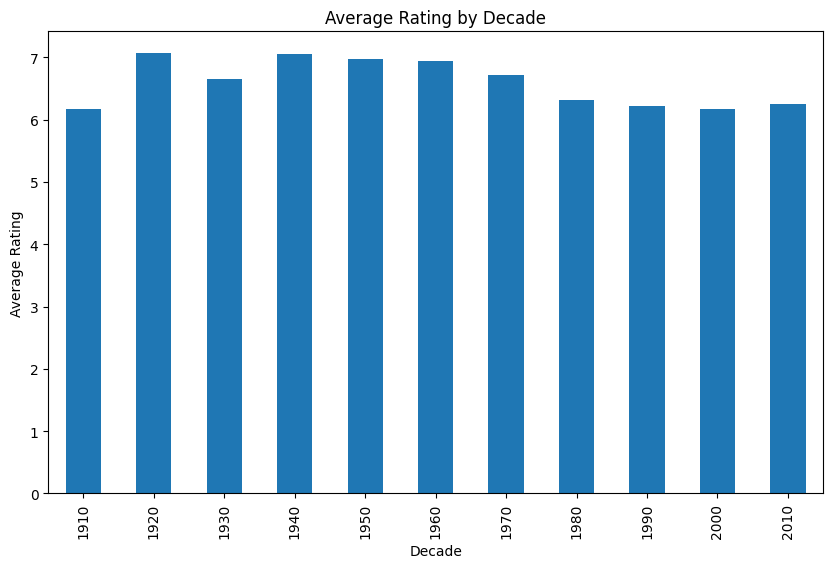

In [17]:
import matplotlib.pyplot as plt
filtered_df['decade'] = (filtered_df['year'] // 10) * 10

# Группируем данные по десятилетиям и считаем средний рейтинг
grouped = filtered_df.groupby('decade')['vote_average'].mean()

# Строим график зависимости среднего рейтинга от десятилетия
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.title('Average Rating by Decade')
plt.show()



Что вам сказать - вот в 20х умели снимать фильмы!

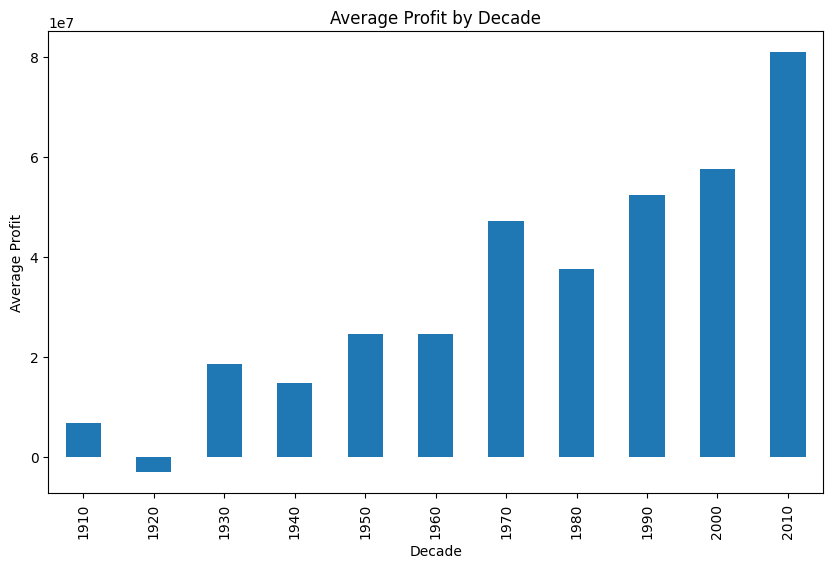

In [25]:
# Группируем данные по десятилетиям и вычисляем средний профит
avg_profit_by_decade = filtered_df.groupby('decade')['profit'].mean()

# Строим график гистограммой зависимости среднего профита от десятилетия
avg_profit_by_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Average Profit')
plt.title('Average Profit by Decade')
plt.show()

А вот делать деньги на них не умели)

четко видим, что кинематограф учился делать деньги: только со временем это стало прибыльно!

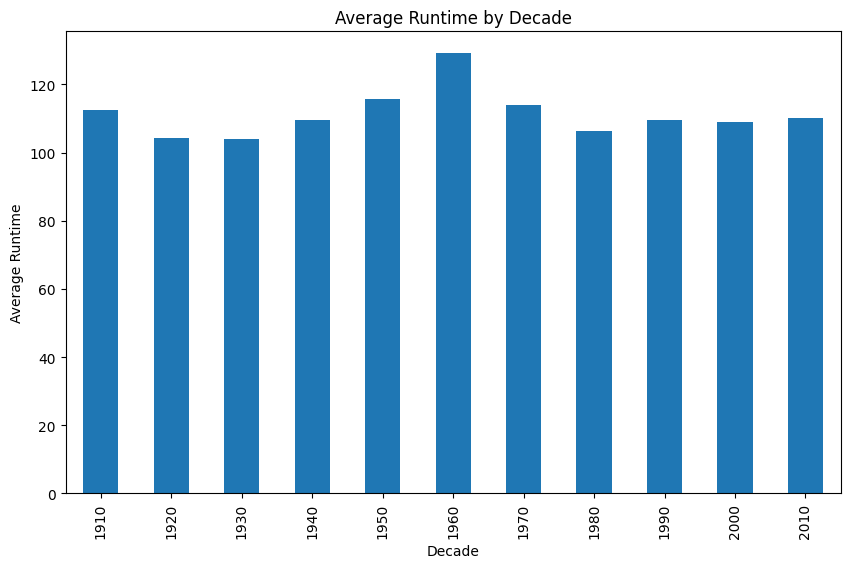

In [28]:
# Группируем данные по десятилетиям и вычисляем средний рантайм
avg_runtime_by_decade = filtered_df.groupby('decade')['runtime'].mean()

# Строим график гистограммой зависимости среднего профита от десятилетия
avg_runtime_by_decade.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decade')
plt.ylabel('Average Runtime')
plt.title('Average Runtime by Decade')
plt.show()

Эх,ну вот в 60х любили долго, а в последние годы все быстро(

Ну и дальше смотрим все возможные зависимости, чтобы выцепить что-то интересненькое:

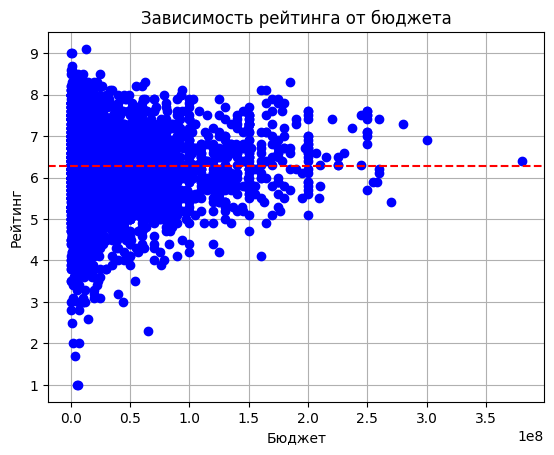

In [19]:
import matplotlib.pyplot as plt

plt.plot(filtered_df['budget'], filtered_df['vote_average'], linestyle=' ', marker='o', color='b')
plt.xlabel('Бюджет')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от бюджета')
plt.grid(True)

plt.axhline(y=average_rating, color='r', linestyle='--')
plt.show()

Итак, чем выше бюджет - тем меньше разброс по рейтингу. То есть высокий бюджет гарантирует стабильный рейтинг на уровне среднего. (Похоже на нормальное распределение))

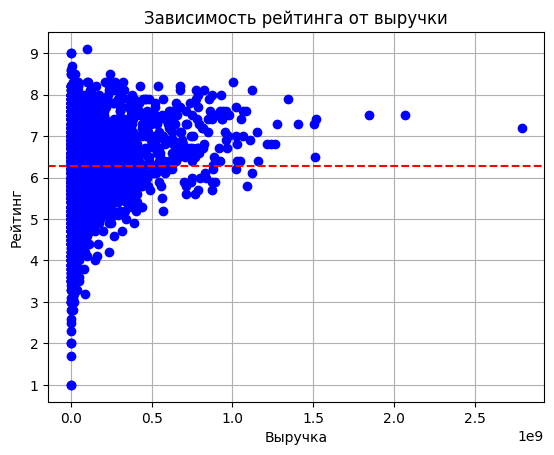

In [20]:
plt.plot(filtered_df['revenue'], filtered_df['vote_average'], linestyle=' ', marker='o', color='b')
plt.xlabel('Выручка')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от выручки')
plt.grid(True)
plt.axhline(y=average_rating, color='r', linestyle='--')
plt.show()

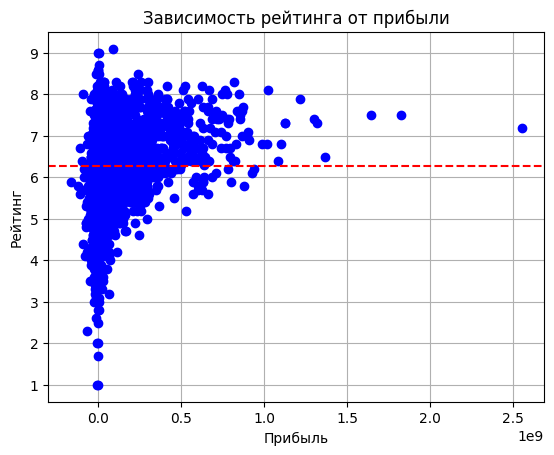

In [26]:
plt.plot(filtered_df['profit'], filtered_df['vote_average'], linestyle=' ', marker='o', color='b')
plt.xlabel('Прибыль')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от прибыли')
plt.grid(True)
plt.axhline(y=average_rating, color='r', linestyle='--')
plt.show()

Нормельное распределение, ты ли это? Причем во всех трех случаях. 

Зависят ли они друг от друга? (Проверим выручку и бюджет)

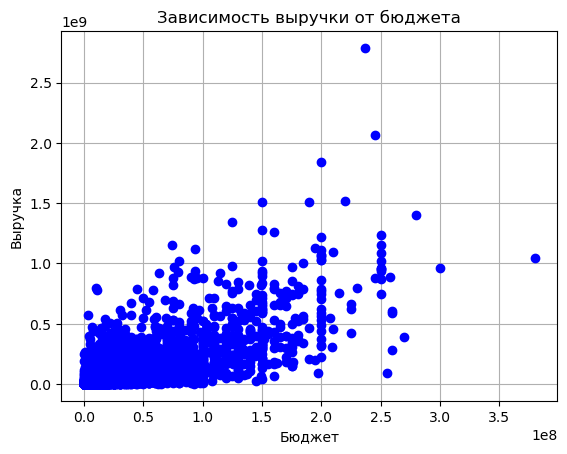

In [87]:
plt.plot(filtered_df['budget'], filtered_df['revenue'], linestyle=' ', marker='o', color='b')
plt.xlabel('Бюджет')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от бюджета')
plt.grid(True)

plt.show()

Очень похоже на положительную корреляцию! Вспомним формулы и еще здесь всякие коэффициенты посчитаем, чтобы убедиться

In [21]:
average_runtime=filtered_df['runtime'].mean()
average_runtime

109.81313977293877

У нас есть еще одна переменная - длительность фильма.

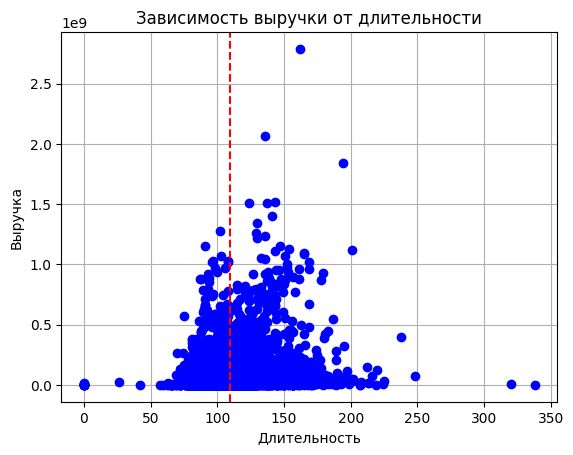

In [23]:
plt.plot(filtered_df['runtime'], filtered_df['revenue'], linestyle=' ', marker='o', color='b')
plt.xlabel('Длительность')
plt.ylabel('Выручка')
plt.title('Зависимость выручки от длительности')
plt.grid(True)

plt.axvline(x=average_runtime, color='r', linestyle='--')
plt.show()

Снова красивое распределение)) А еще посмотрим зависимость рейтинга от длительности:

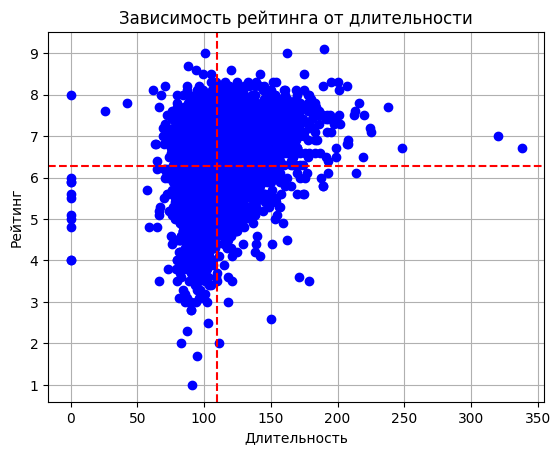

In [24]:
plt.plot(filtered_df['runtime'], filtered_df['vote_average'], linestyle=' ', marker='o', color='b')
plt.xlabel('Длительность')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от длительности')
plt.grid(True)

plt.axvline(x=average_runtime, color='r', linestyle='--')
plt.axhline(y=average_rating, color='r', linestyle='--')
plt.show()

Тут, конечно, хаос...

Итак, это наработки на нынешний момент. Мы так и не поняли, каким образом выявлять какие-либо корреляции по актерам (поэтому отказались от этой идеи)

А вот по жанрам возможно еще добьем, этот раздел в разработке

>Что будем в ML запихивать? 

>Хотим предсказывать рейтинг фильма, на основе данных о годе, бюджете, длительности, выручке, + о жанре

Может вы посоветуете еще что-то, в общем - пожалуйста, дайте нам фидбек! 

Мы пока не очень понимаем, норм ли то, что мы делаем или жесткий стрем